GROUP A

1. Write a Python program to plot a few activation functions that are being used in neural networks.

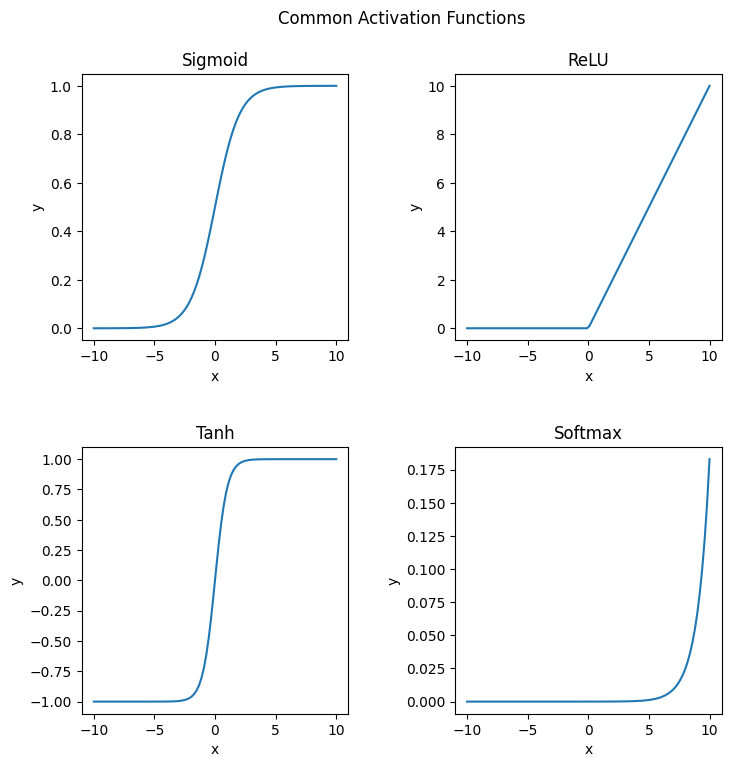

In [ ]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt

#define activation functions    -> what is activation function?
def sigmoid(x):                 # (working of individual activation function)
    return 1 / (1 + np.exp(-x))  

def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x))

# Create range of values from -10 to +10 having 100 values
x = np.linspace(-10, 10, 100)


#main plotting of individual functions
# Create plots for each activation function

fig, axs = plt.subplots(2, 2, figsize=(8, 8)) #create matrix(2,2) of subplots 

axs[0, 0].plot(x, sigmoid(x))               #plotting the output of all the points in x after passing through the sigmoid function
axs[0, 0].set_title('Sigmoid')              #only setting title as sigmoid

axs[0, 1].plot(x, relu(x))                  #plotting the output of all the points in x after passing through the relu function
axs[0, 1].set_title('ReLU')

axs[1, 0].plot(x, tanh(x))                  #plotting the output of all the points in x after passing through the tanh function
axs[1, 0].set_title('Tanh')

axs[1, 1].plot(x, softmax(x))               #plotting the output of all the points in x after passing through the softmax function
axs[1, 1].set_title('Softmax')

# Add common axis labels and titles  to the subplot
fig.suptitle('Common Activation Functions')
for ax in axs.flat:
    ax.set(xlabel='x', ylabel='y')
    
# Adjust spacing between subplots
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

# Show the plot
plt.show() 


2.Generate ANDNOT function using McCulloch-Pitts neural net by a python program.

In [ ]:
# importing libraries   
import numpy as np
                                        #-> what is mcculloch pitts model
# function of checking thresold value 
def linear_threshold_gate(dot, T):  #ANDNOT FUNCION
    '''Returns the binary threshold output'''
    if dot >= T:
        return 1
    else:
        return 0

# matrix of inputs
#input array
input_table = np.array([
    [0,0], # both no
    [0,1], # one no, one yes
    [1,0], # one yes, one no
    [1,1]  # both yes
])

print(f'input table:\n{input_table}')

#predefined weights
weights = np.array([1,-1])

#dot product of input table and weight
dot_products = input_table @ weights   #syntax for dot product

T = 1   #Threshold value
for i in range(0,4):
    activation = linear_threshold_gate(dot_products[i], T)
    print(f'Activation: {activation}')

input table:
[[0 0]
 [0 1]
 [1 0]
 [1 1]]
Activation: 0
Activation: 0
Activation: 1
Activation: 0


3.Write a Python Program using Perceptron Neural Network to recognise even and odd numbers. Given numbers are in ASCII form 0 to 9

In [ ]:
#import libraries
import numpy as np

# Define the perceptron class
class Perceptron:
    def __init__(self, input_size, lr=0.1): 
        self.W = np.zeros(input_size + 1)   #weight matrix is initially initialized to 0 -> [0,0,0,0,0,0,0,0,0,0,0]
        self.lr = lr                        #learning rate (alpha)

    def activation_fn(self, x):
        return 1 if x >= 0 else 0          #binary step activation function
    
    def predict(self, v):
        x = np.insert(v, 0, 1)
        z = self.W.T.dot(x)                # dot product of weight matrix and instance of input array and .T is used for transpose
        a = self.activation_fn(z)          
        return a


    def train(self, X, Y, epochs):         #epochs is the number iterations the neural network will go through during the learning phase
        for _ in range(epochs):            # _ is used when Basically it means you are not interested in how many times the loop is run till now just that it should run some specific number of times overall
            for i in range(Y.shape[0]):    
                x = X[i]
                y = self.predict(x)
                e = Y[i] - y
                self.W = self.W + self.lr * e * np.insert(x, 0, 1)  #perceptron training function


# Define the input data and labels
#training input array
X = np.array([
    [0,0,0,0,0,0,0,0,0,0], # 0
    [0,0,0,0,0,0,0,0,0,1], # 1
    [0,0,0,0,0,0,0,0,1,0], # 2
    [0,0,0,0,0,0,0,0,1,1], # 3
    [0,0,0,0,0,0,0,1,0,0], # 4
    [0,0,0,0,0,0,0,1,0,1], # 5
    [0,0,0,0,0,0,0,1,1,0], # 6
    [0,0,0,0,0,0,0,1,1,1], # 7
    [0,0,0,0,0,0,1,0,0,0], # 8
    [0,0,0,0,0,0,1,0,0,1], # 9
])

Y = np.array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1])  

# Create the perceptron and train it
perceptron = Perceptron(input_size=10) 
perceptron.train(X, Y, epochs=100) 

# Test the perceptron on some input data
# Testing array
test_X = np.array([
    [0,0,0,0,0,0,0,0,0,0], # 0
    [0,0,0,0,0,0,0,0,0,1], # 1
    [0,0,0,0,0,0,0,0,1,0], # 2
    [0,0,0,0,0,0,0,0,1,1], # 3
    [0,0,0,0,0,0,0,1,0,0], # 4
    [0,0,0,0,0,0,0,1,0,1], # 5
    [0,0,0,0,0,0,0,1,1,0], # 6
    [0,0,0,0,0,0,0,1,1,1], # 7
    [0,0,0,0,0,0,1,0,0,0], # 8
    [0,0,0,0,0,0,1,0,0,1], # 9
])

for i in range(test_X.shape[0]):
  x = test_X[i]
  y = perceptron.predict(x)
  print(f'{x} is {"even" if y == 0 else "odd"}')

[0 0 0 0 0 0 0 0 0 0] is even
[0 0 0 0 0 0 0 0 0 1] is odd
[0 0 0 0 0 0 0 0 1 0] is even
[0 0 0 0 0 0 0 0 1 1] is odd
[0 0 0 0 0 0 0 1 0 0] is even
[0 0 0 0 0 0 0 1 0 1] is odd
[0 0 0 0 0 0 0 1 1 0] is even
[0 0 0 0 0 0 0 1 1 1] is odd
[0 0 0 0 0 0 1 0 0 0] is even
[0 0 0 0 0 0 1 0 0 1] is odd


4.With a suitable example demonstrate the perceptron learning law with its decision regions using python. Give the output in graphical form.

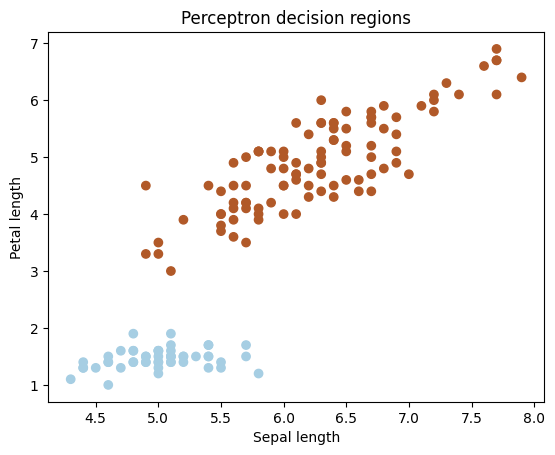

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# load iris dataset
iris = load_iris()

# print(iris)
# extract sepal length and petal length features
X = iris.data[:, [0, 2]]
y = iris.target

# setosa is class 0, versicolor and verginica is class 1  
y = np.where(y == 0, 0, 1) 

# initialize weights and bias
w = np.zeros(2)
b = 0

# set learning rate and number of epochs
lr = 0.1
epochs = 50

# define perceptron function
def perceptron(x, w, b):
    # calculate weighted sum of inputs
    z = np.dot(x, w) + b
    # apply step function
    return np.where(z >= 0, 1, 0)

# train the perceptron
for epoch in range(epochs):
    for i in range(len(X)):
        x = X[i]
        target = y[i]
        output = perceptron(x, w, b)
        error = target - output
        w += lr * error * x  #w=w+lr*error*x     #readjusting the weight after calculating the error functions
        b += lr * error     #b=b+lr*error        #readjusting the bias after calculating the error functions

# plot decision boundary
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5  #decision boundary from min value-0.5 to max value+0.5 for features of iris data
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5  #decision boundary from min value-0.5 to max value+0.5 for target value of iris data
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),     #The np.meshgrid() function takes 1-D array as an input and returns two 2-dimensional arrays, X and Y, that represent the coordinate grid.
                     np.arange(y_min, y_max, 0.02))
Z = perceptron(np.c_[xx.ravel(), yy.ravel()], w, b)  #np.c_[] converts 1-d array to 2-d array, xx.ravel() and yy.ravel() converts 2d array to 1d array hence to perceptron a 2d array is passed
Z = Z.reshape(xx.shape) #reshaping the output according to output of xx
# plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

# plot data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Petal length')
plt.title('Perceptron decision regions')
plt.show()

#here blue color points are iris setosa and red color points are versicolor and verginica

5.Write a python Program for Bidirectional Associative Memory with two pairs of vectors

In [ ]:
import numpy as np
                              # what is bam?
                              # Working of bam.
# define two pairs of vectors
x1 = np.array([1, 1, 1, -1])
y1 = np.array([1, -1])
x2 = np.array([-1, -1, 1, 1])
y2 = np.array([-1, 1])

# compute weight matrix W
W = np.outer(y1, x1) + np.outer(y2, x2)  #The np.outer() function is a NumPy function that computes the outer product of two arrays. 
                                        # It takes two 1-dimensional arrays as input and returns a 2-dimensional array as output.
                                        # arr1 = np.array([1, 2, 3])
                                          # arr2 = np.array([4, 5, 6])
                                          # [[ 4  5  6]
                                          #  [ 8 10 12]
                                          #  [12 15 18]]
                                      
# define BAM function
def bam(x):
    y = np.dot(W, x)
    y = np.where(y >= 0, 1, -1)
    return y

# test BAM with inputs
x_test = np.array([1, -1, -1, -1])
y_test = bam(x_test)

# print output
print("Input x: ", x_test)
print("Output y: ", y_test)

Input x:  [ 1 -1 -1 -1]
Output y:  [ 1 -1]


6.Implement Artificial Neural Network training process in Python by using Forward Propagation, Back Propagation.

In [ ]:
import numpy as np

class NeuralNetwork:
    def __init__(self, input_dim, hidden_dim, output_dim):
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        
        # Initialize weights with random values
        self.W1 = np.random.randn(self.input_dim, self.hidden_dim)
        self.b1 = np.zeros((1, self.hidden_dim))
        self.W2 = np.random.randn(self.hidden_dim, self.output_dim)
        self.b2 = np.zeros((1, self.output_dim))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def forward_propagation(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)
        
    def sigmoid_derivative(self, x):
        return x * (1 - x)
    
    def back_propagation(self, X, y, learning_rate):
        m = X.shape[0]
        
        # Compute the gradients
        delta2 = (self.a2 - y) * self.sigmoid_derivative(self.a2)
        dW2 = np.dot(self.a1.T, delta2)
        db2 = np.sum(delta2, axis=0, keepdims=True)
        
        delta1 = np.dot(delta2, self.W2.T) * self.sigmoid_derivative(self.a1)
        dW1 = np.dot(X.T, delta1)
        db1 = np.sum(delta1, axis=0)
        
        # Update the weights and biases
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1
    
    def train(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            # Forward propagation
            self.forward_propagation(X)
            
            # Backpropagation
            self.back_propagation(X, y, learning_rate)
            
            # Compute and print the loss (mean squared error)
            loss = np.mean((self.a2 - y) ** 2)
            if epoch % 100 == 0:
                print(f"Epoch {epoch}: Loss = {loss:.4f}")
# Generate synthetic data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Generate synthetic data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Create and train the neural network
nn = NeuralNetwork(input_dim=2, hidden_dim=4, output_dim=1)
nn.train(X, y, epochs=1000, learning_rate=0.1)


Epoch 0: Loss = 0.2814
Epoch 100: Loss = 0.2469
Epoch 200: Loss = 0.2418
Epoch 300: Loss = 0.2367
Epoch 400: Loss = 0.2313
Epoch 500: Loss = 0.2255
Epoch 600: Loss = 0.2193
Epoch 700: Loss = 0.2128
Epoch 800: Loss = 0.2062
Epoch 900: Loss = 0.1997


7. Write a python program to design a Hopfield Network which stores 4 vectors

In [ ]:
import numpy as np

class HopfieldNetwork:
    def __init__(self, n_neurons):
        self.n_neurons = n_neurons
        self.weights = np.zeros((n_neurons, n_neurons))

    def train(self, patterns):
        for pattern in patterns:
            self.weights += np.outer(pattern, pattern)
        np.fill_diagonal(self.weights, 0)

    def predict(self, pattern):
        energy = -0.5 * np.dot(np.dot(pattern, self.weights), pattern)
        return np.sign(np.dot(pattern, self.weights) + energy)

if __name__ == '__main__':
    patterns = np.array([
        [1, 1, -1, -1],
        [-1, -1, 1, 1],
        [1, -1, 1, -1],
        [-1, 1, -1, 1]
    ])

    n_neurons = patterns.shape[1]
    network = HopfieldNetwork(n_neurons)
    network.train(patterns)

    for pattern in patterns:
        prediction = network.predict(pattern)
        print('Input pattern:', pattern)
        print('Predicted pattern:', prediction)

Input pattern: [ 1  1 -1 -1]
Predicted pattern: [-1. -1. -1. -1.]
Input pattern: [-1 -1  1  1]
Predicted pattern: [-1. -1. -1. -1.]
Input pattern: [ 1 -1  1 -1]
Predicted pattern: [-1. -1. -1. -1.]
Input pattern: [-1  1 -1  1]
Predicted pattern: [-1. -1. -1. -1.]


8.How to Train a Neural Network with TensorFlow/Pytorch and evaluation of logistic regression using tensorflow

In [ ]:
#import libraries
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer

#load the dataset
df=load_breast_cancer()

#preparation of data
X_train,X_test,y_train,y_test=train_test_split(df.data,df.target,test_size=0.20,random_state=42)

sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

# define neural network
model=tf.keras.models.Sequential([tf.keras.layers.Dense(1,activation='sigmoid',input_shape=(X_train.shape[1],))])

#compile
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

#train
model.fit(X_train,y_train,epochs=5,verbose=1)
y_pred=model.predict(X_test)

#evaluate
test_loss,test_accuracy=model.evaluate(X_test,y_test)
print("accuracy is",test_accuracy)

Epoch 1/5
15/15 [==============================] - 1s 2ms/step - loss: 0.7683 - accuracy: 0.5055
Epoch 2/5
15/15 [==============================] - 0s 2ms/step - loss: 0.6660 - accuracy: 0.6286
Epoch 3/5
15/15 [==============================] - 0s 2ms/step - loss: 0.5822 - accuracy: 0.7253
Epoch 4/5
15/15 [==============================] - 0s 2ms/step - loss: 0.5126 - accuracy: 0.7824
Epoch 5/5
4/4 [==============================] - 0s 4ms/step - loss: 0.4258 - accuracy: 0.8333
accuracy is 0.8333333134651184


9.TensorFlow/Pytorch implementation of CNN

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test = X_test.reshape(-1, 28, 28, 1) / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=64, epochs=10, verbose=1)

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


"""
# Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
  Conv2d - 2-dimensional convolutional layer in Keras. used for images
  32 -  It indicates the number of filters used in convolutional layer - each filter is used to detect different pattern and extract different feature from the data
  (3,3)- this is the kernel size or spatial dimensions of the filter,it is a matrix that slides across the image for extracting features and is multipled by output matrix to enhance the output
  activation function used is relu- rectified linear unit
  input shape 28,28,1 says that the convolutional layer will get an image of 28 pixels X 28 pixels with 1 color channel(grayscale images) if it has 3 color channel (RGB images)

  MaxPooling2D((2, 2)),
  MaxPooling2D - 2 dimensional max pooling layer using keras 
  (2,2)- It defines the pool size for the max pooling operation.
  the MaxPooling2D layer helps in downsampling and retaining the most relevant information from the input feature maps, leading to spatial invariance and efficient
  feature extraction in convolutional neural networks

  flatten()- The purpose of the Flatten() layer is to reshape the input data while preserving the total number of elements. It takes a multi-dimensional tensor as input
   (e.g., output from a convolutional layer) and converts it into a one-dimensional vector or array. This transformation allows the subsequent layers (such as fully connected layers)
    to process the data as a flat vector rather than a tensor.the Flatten() layer is a crucial component in transitioning between convolutional and fully connected layers, allowing the 
    network to handle multi-dimensional input data and extract higher-level features in deep learning models.
"""

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/10
938/938 [==============================] - 58s 61ms/step - loss: 0.1794 - accuracy: 0.9457
Epoch 2/10
938/938 [==============================] - 58s 62ms/step - loss: 0.0494 - accuracy: 0.9845
Epoch 3/10
938/938 [==============================] - 57s 61ms/step - loss: 0.0344 - accuracy: 0.9892
Epoch 4/10
938/938 [==============================] - 58s 62ms/step - loss: 0.0260 - accuracy: 0.9917
Epoch 5/10
938/938 [==============================] - 57s 60ms/step - loss: 0.0216 - accuracy: 0.9935
Epoch 6/10
938/938 [==============================] - 56s 59ms/step - loss: 0.0181 - accuracy: 0.9942
Epoch 7/10
938/938 [==============================] - 57s 61ms/step - loss: 0.0143 - accuracy: 0.9954
Epoch 8/10
938/938 [==============================] - 56s 60ms/step - loss: 0.0117 - accuracy: 0.9962
Epoch 9/10
938/938 [==============================] - 56s 60ms/step - loss: 0.0111 - accuracy: 0.9962
Epoch 10/10
313/3

"\n# Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),\n  Conv2d - 2-dimensional convolutional layer in Keras. used for images\n  32 -  It indicates the number of filters used in convolutional layer - each filter is used to detect different pattern and extract different feature from the data\n  (3,3)- this is the kernel size or spatial dimensions of the filter,it is a matrix that slides across the image for extracting features and is multipled by output matrix to enhance the output\n  activation function used is relu- rectified linear unit\n  input shape 28,28,1 says that the convolutional layer will get an image of 28 pixels X 28 pixels with 1 color channel(grayscale images) if it has 3 color channel (RGB images)\n\n  MaxPooling2D((2, 2)),\n  MaxPooling2D - 2 dimensional max pooling layer using keras \n  (2,2)- It defines the pool size for the max pooling operation.\n  the MaxPooling2D layer helps in downsampling and retaining the most relevant information from the input

10.MNIST Handwritten Character Detection using PyTorch, Keras and Tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

# Load and preprocess the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0

# Define the model architecture
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=64, epochs=10, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

Epoch 1/10
938/938 [==============================] - 8s 8ms/step - loss: 0.2940 - accuracy: 0.9180
Epoch 2/10
938/938 [==============================] - 9s 9ms/step - loss: 0.1328 - accuracy: 0.9618
Epoch 3/10
938/938 [==============================] - 5s 6ms/step - loss: 0.0926 - accuracy: 0.9730
Epoch 4/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0703 - accuracy: 0.9789
Epoch 5/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0558 - accuracy: 0.9836
Epoch 6/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0440 - accuracy: 0.9869
Epoch 7/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0360 - accuracy: 0.9894
Epoch 8/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0298 - accuracy: 0.9912
Epoch 9/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0238 - accuracy: 0.9934
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.0676 - accuracy: 0.9799